# Conways Game of Life

John Horton Conway erfand 1970 das "Game of Life". Dabei handelt es sich um einen so genannten zellularen Automaten handelt. Stellen wir uns dazu ein zweidimenionales, endliches Gitter der Größe $N \times N$ vor. Jeder Zelle dieses Gitters kann eindeutig einer von zwei möglichen Zuständen zugewiesen werden. Tot oder lebendig, $0$ oder $1$, rot oder grün, ...

## Spielvorbereitung
Zunächst erstellen wir ein Spielfeld auf dem wir das Game of Life spielen können. Dieser soll zunächst aus einem $10 \times 10$ Felder großen Gitter bestehen. Dieses Spielfeld können wir in einer Matrix mit $10 \times 10$ Einträgen speichern. Um später das Verhalten an den Rändern einfacher zu machen, empfiehlt es sich das Spielfeld gleich $12 \times 12$ groß anzulegen. Eine lebendige Zelle stellen wir dazu durch eine $1$ dar, eine tote Zelle durch eine $0$. Erstellen Sie nun zunächst das Spielfeld und stellen dieses dar. Die Zellen dieses Spielfeldes sollen zufällig belegt werden. Der Rand soll jedoch ausschließlich mit Nullen belegt werden.

In [13]:
% Spielfeld

%%Fügen Sie hier Ihren Code ein, um ein Spielfeld zu erzeugen, dessen Felder zufällig belegt sind.


Ihr Spieldfeld sollte ungefähr so aussehen (natürlich mit einer anderen, zufälligen Verteilung): 

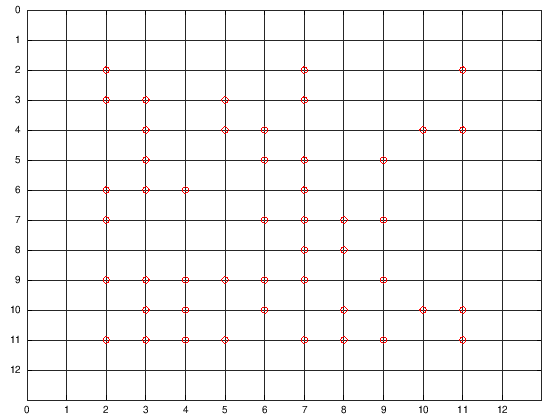

In [41]:
% Spielfeld
game_size = 12;
table = round(rand(game_size, game_size));
table(1,:) = 0;
table(:,1) = 0;
table(:,game_size) = 0;
table(game_size,:) = 0;
axis([-game_size game_size -game_size game_size])
spy(table, 'ro')
set(gca, 'xtick', [0:1:12])
set(gca, 'ytick', [0:1:12])
grid on

Testen Sie gern ein wenig, wie Sie die Darstellung nach Ihren Wünschen anpassen können!

```{admonition} Tipps
1. Um einen Eintrag Ihrer Matrix zufallsbasiert mit einer $1$ oder $0$ zu belegen, können Sie die Funktionen [round()](https://de.mathworks.com/help/matlab/ref/round.html) und  [rand()](https://de.mathworks.com/help/matlab/ref/rand.html) kombinieren.
2. Um eine solche [dünnbesetzte](https://lmgtfy.com/?q=sparse+matrix) Matrix einfach darstellen zu können bietet sich [spy()](https://de.mathworks.com/help/matlab/ref/spy.html) an.
```

## Spielregeln

Das Game of Life kommt ganz ohne Spieler aus, wir müssen lediglich einige Spielregeln definieren und können dann ganz entspannt dem Spiel zu sehen, wie es sich selbst spielt. Überlegen Sie sich, wie Sie, zunächst nur für eine Runde, die folgenden Regeln implementieren können:

1. Jede lebendige Zelle mit weniger als zwei lebendigen Nachbarn stirbt an Einsamkeit.

```{figure} images/Tod.gif
---
height: 200px
name: Tod_einsam
---
Tod durch Einsamkeit
```

2. Jede lebendige Zelle mit zwei oder drei lebendigen Nachbarn überlebt.

```{figure} images/Nix.png
---
height: 200px
name: Überleben
---
Überleben durch Wohlfühlatmosphäre
```

3. Jede lebendige Zelle mit mehr als drei lebendigen Nachbarn stirbt an Überbevölkerung.

```{figure} images/Tod_ueber.gif
---
height: 200px
name: Tod_ueber
---
Tod durch Überbevölkerung
```

4. Jede tote Zelle mit genau drei lebendigen Zellen wird durch Reproduktion geboren.

```{figure} images/Geburt.gif
---
height: 200px
name: Geburt
---
Geburt durch Reproduktion
```

Plotten Sie dazu erneut Ihre Startverteilung und die neue Verteilung. Können Sie durch Vergleich die korrekte Anwendung aller Regeln validieren?

In [ ]:
% Erneutes Plotten der Startverteilung


% Zählen der lebendigen Nachbarn jeder Zelle


% Tod durch Einsamkeit


% Tod durch Überbevölkerung


% Geburt durch Reproduktion


% Plotten der neuen Verteilung

Ihr Ergebnis sollte ungefähr so aussehen:

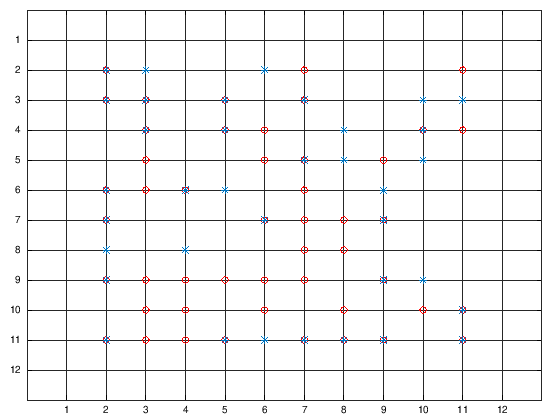

In [44]:
% Erneutes Plotten der Startverteilung
spy(table, 'ro')
set(gca, 'xtick', [1:1:12])
set(gca, 'ytick', [1:1:12])
grid on

% Zählen der lebendigen Nachbarn jeder Zelle
table_n = table;
for i = 2:game_size-1
    for j = 2:game_size-1
        neighbors = table(i-1,j) + table(i+1,j) + table(i,j-1) + table(i,j+1) + table(i-1, j+1) + table(i+1, j+1) + table(i-1, j-1) + table(i+1, j-1);

% Tod durch Einsamkeit und Tod durch Überbevölkerung

        if neighbors < 2 || neighbors > 3
            table_n(i,j) = 0;
        
% Geburt durch Reproduktion

        elseif neighbors == 3
            table_n(i,j) = 1;
            
        end
    end
end

% Plotten der neuen Verteilung
hold on
spy(table_n)
set(gca, 'xtick', [1:1:12])
set(gca, 'ytick', [1:1:12])
grid on